# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [28]:
import pandas as pd 


In [29]:
# your code here
df=pd.read_csv('tic-tac-toe.csv')
df.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [30]:
df.info

<bound method DataFrame.info of     TL TM TR ML MM MR BL BM BR  class
0    x  x  x  x  o  o  x  o  o   True
1    x  x  x  x  o  o  o  x  o   True
2    x  x  x  x  o  o  o  o  x   True
3    x  x  x  x  o  o  o  b  b   True
4    x  x  x  x  o  o  b  o  b   True
..  .. .. .. .. .. .. .. .. ..    ...
953  o  x  x  x  o  o  o  x  x  False
954  o  x  o  x  x  o  x  o  x  False
955  o  x  o  x  o  x  x  o  x  False
956  o  x  o  o  x  x  x  o  x  False
957  o  o  x  x  x  o  o  x  x  False

[958 rows x 10 columns]>

In [31]:
df.isnull().sum()

TL       0
TM       0
TR       0
ML       0
MM       0
MR       0
BL       0
BM       0
BR       0
class    0
dtype: int64

In [32]:
data_encoded = pd.get_dummies(df, columns=['TL', 'TM', 'TR', 'ML', 'MM', 'MR', 'BL', 'BM', 'BR'])

X = data_encoded.drop('class', axis=1)
y = data_encoded['class']

# Convert target to binary (True = 1, False = 0)
y = y.astype(int)
X.dtypes
y.dtypes

dtype('int32')

In [33]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)

# Convert back to DataFrame for easy viewing
X = pd.DataFrame(X_sc, columns=X.columns)

print("Normalized Inputs (X):")
print(X.head())

print("Target Output (y):")
print(y.head())

Normalized Inputs (X):
   TL_b  TL_o  TL_x  TM_b  TM_o  TM_x  TR_b  TR_o  TR_x  ML_b  ...  MR_x  \
0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0  ...   0.0   
1   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0  ...   0.0   
2   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0  ...   0.0   
3   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0  ...   0.0   
4   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0  ...   0.0   

   BL_b  BL_o  BL_x  BM_b  BM_o  BM_x  BR_b  BR_o  BR_x  
0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   1.0   0.0  
1   0.0   1.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0  
2   0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0  
3   0.0   1.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0  
4   1.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0  

[5 rows x 27 columns]
Target Output (y):
0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int32


## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [34]:
#%pip kiras
#%pip install tensorflow

In [35]:
# your code here
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")
print(f"Training data shape: {y_train.shape}, Test data shape: {y_test.shape}")



Training data shape: (766, 27), Test data shape: (192, 27)
Training data shape: (766,), Test data shape: (192,)


In [43]:



model=Sequential()

model.add(Dense(60,activation='relu',input_dim=27))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
    

model.add(Dense(2, activation='softmax'))  

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\NOURA\anaconda3\envs\ironhack\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
fit_model=model.fit(X_train,y_train,epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5509 - loss: 0.6814 - val_accuracy: 0.7078 - val_loss: 0.5886
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7110 - loss: 0.5612 - val_accuracy: 0.7662 - val_loss: 0.5400
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7735 - loss: 0.4827 - val_accuracy: 0.7273 - val_loss: 0.5111
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8103 - loss: 0.4457 - val_accuracy: 0.7468 - val_loss: 0.4784
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8344 - loss: 0.3947 - val_accuracy: 0.7597 - val_loss: 0.4404
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8600 - loss: 0.3223 - val_accuracy: 0.8182 - val_loss: 0.3581
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9340 - loss: 0.2387 - val_accuracy: 0.9156 - val_loss: 0.2866
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9638 - loss: 0.1631 - val_accuracy: 0.9545 - val_

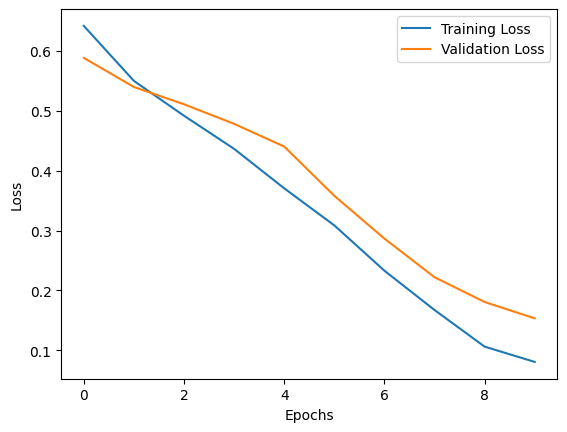

In [45]:
import matplotlib.pyplot as plt

plt.plot(fit_model.history['loss'], label='Training Loss')
plt.plot(fit_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [46]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9510 - loss: 0.1357 
Test Loss: 0.1317
Test Accuracy: 0.9531


In [49]:
model.save('tic-tac-toe.keras')


## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [58]:
from tensorflow.keras.models import load_model
import numpy as np

# Load the saved model
lm = load_model('tic-tac-toe.keras')

# Make predictions using the loaded model
predictions = lm.predict(X_sample)

# Get the predicted class (argmax of the probabilities)
predicted_labels = np.argmax(predictions, axis=1)

# Check the shape of predictions and predicted_labels
print("Shape of predictions:", predictions.shape)
print("Shape of predicted_labels:", predicted_labels.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Shape of predictions: (5, 2)
Shape of predicted_labels: (5,)


In [59]:
# Compare predictions with actual labels
for i in range(len(predicted_labels)):
    print(f"Sample {i + 1}:")
    print(f"  Actual: {y_sample.iloc[i]}")
    print(f"  Predicted: {predicted_labels[i]}")
    print(f"  Correct: {y_sample.iloc[i] == predicted_labels[i]}")

Sample 1:
  Actual: 1
  Predicted: 1
  Correct: True
Sample 2:
  Actual: 0
  Predicted: 0
  Correct: True
Sample 3:
  Actual: 1
  Predicted: 1
  Correct: True
Sample 4:
  Actual: 0
  Predicted: 0
  Correct: True
Sample 5:
  Actual: 1
  Predicted: 1
  Correct: True


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [ ]:
# your code here

**Which approach(es) did you find helpful to improve your model performance?**

In [ ]:
# your answer here